# Importing all necessary libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Exploratory Data Analysis

In [7]:
df.shape

(1338, 7)

In [8]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#check if there is any missing values in the dataframe
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#check if there is any any duplicate values in the dataframe
df.duplicated().sum()


1

In [12]:
#removing the duplicates from the dataset
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1337, 7)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df['smoker']= encoder.fit_transform(df['smoker'])
df['region']=encoder.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [16]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [17]:
correlation=df.corr()
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


# Correlation Matrix

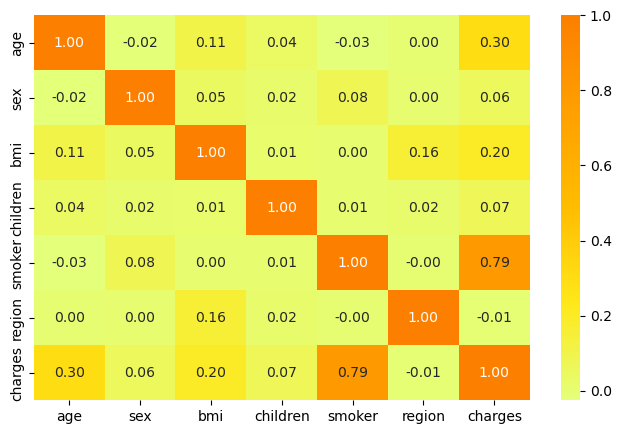

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, cmap='Wistia', fmt='.2f')
plt.show()

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Univariate Analysis

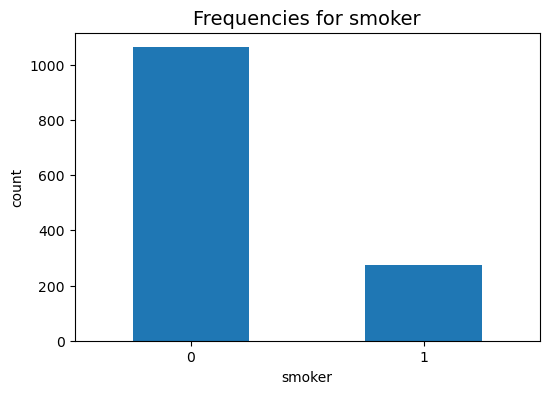

In [20]:
df['smoker'].value_counts().plot(kind='bar', figsize=(6,4), rot=0)
plt.title('Frequencies for smoker', fontsize=14)
plt.xlabel('smoker')
plt.ylabel('count')
plt.show()

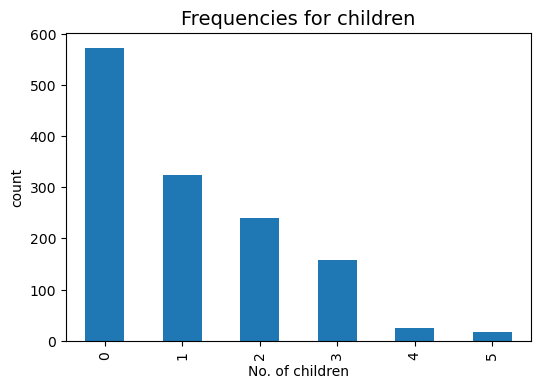

In [21]:
# frequency plot of number of children in the family of the dataset
df['children'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Frequencies for children', fontsize=14)
plt.xlabel('No. of children')
plt.ylabel('count')
plt.show();

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


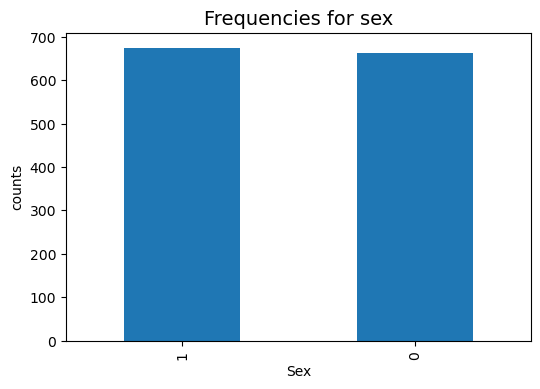

In [23]:
#frequencies plot for sex
df['sex'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Frequencies for sex', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('counts')
plt.show()

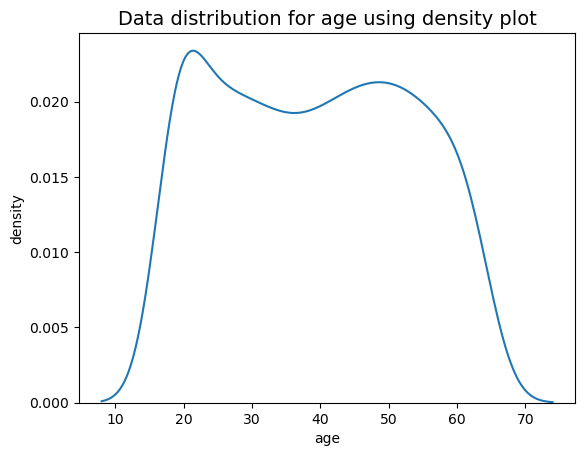

In [24]:
#Density plot for age
sns.distplot(df['age'], hist=False)
plt.title('Data distribution for age using density plot', fontsize=14)
plt.xlabel('age')
plt.ylabel('density')
plt.show()

In [25]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


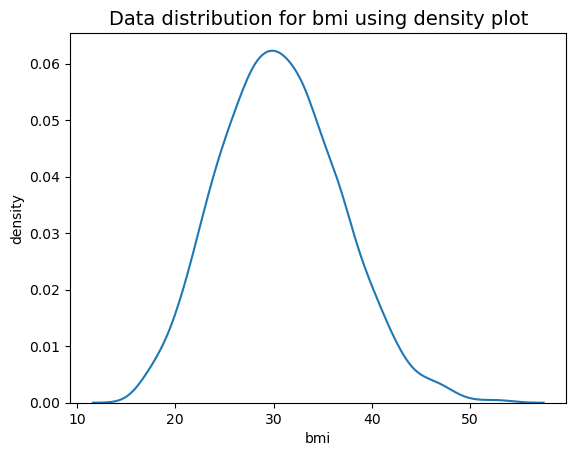

In [26]:
#density plot for bmi
sns.distplot(df['bmi'], hist=False)
plt.title('Data distribution for bmi using density plot', fontsize=14)
plt.xlabel('bmi')
plt.ylabel('density')
plt.show()

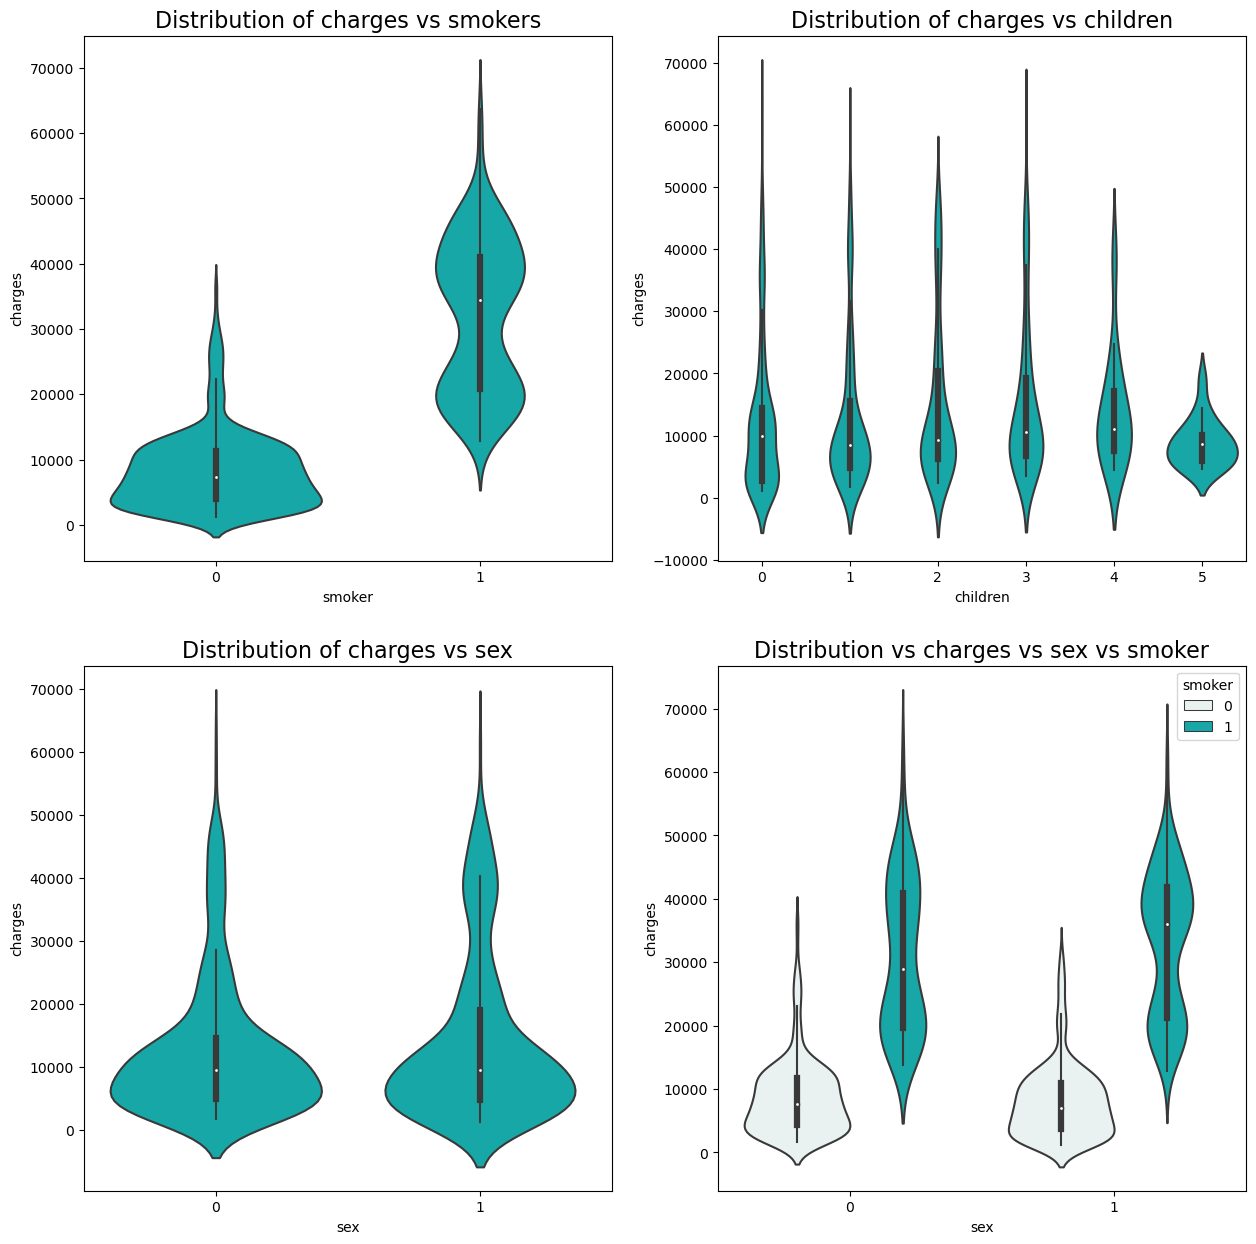

In [27]:
fig=plt.figure(figsize=(15,15))

ax=fig.add_subplot(221)
sns.violinplot(data=df, x=df['smoker'], y=df['charges'], hue=None, color='c', ax=ax)
ax.set_title('Distribution of charges vs smokers', fontsize=16)

ax=fig.add_subplot(222)
sns.violinplot(data=df, x=df['children'], y=df['charges'], hue=None, color='c', ax=ax)
ax.set_title('Distribution of charges vs children', fontsize=16)

ax=fig.add_subplot(223)
sns.violinplot(data=df, x=df['sex'], y=df['charges'], hue=None, color='c', ax=ax)
ax.set_title('Distribution of charges vs sex', fontsize=16)

ax=fig.add_subplot(224)
sns.violinplot(data=df, x=df['sex'], y=df['charges'], hue='smoker', color='c', ax=ax)
ax.set_title('Distribution vs charges vs sex vs smoker', fontsize=16)

plt.show()


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [29]:
#I couldn't understand the main importance of violin plot

In [30]:
#there are no outliers in the datasets
#but how they found exactly??
#I couldn't make it out

In [31]:
#Find the 95th percentile of charge column
charge_value=np.quantile(df['charges'], 0.95)
charge_value

41210.04980000002

In [32]:
#selecting all the rows from the dataset whose charge value is greater than 41210 in order to detect the outliers
df[df['charges']> 41210.04980000002]

,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,1,3,51194.55914
39,60,1,39.900,0,1,3,48173.36100
55,58,1,36.955,2,1,1,47496.49445
86,57,0,31.160,0,1,1,43578.93940
94,64,0,31.300,2,1,3,47291.05500
...,...,...,...,...,...,...,...
1241,64,1,36.960,2,1,2,49577.66240
1284,61,1,36.300,1,1,3,47403.88000
1300,45,1,30.360,0,1,2,62592.87309
1301,62,1,30.875,3,1,1,46718.16325


In [33]:
df.shape

(1337, 7)

# Data preprocessing and modelling

In [34]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Splitting the data into train and test split


In [35]:
X=df.drop(['charges'], axis=1)
y=df['charges']

In [53]:
# X are the features variable, y is the target variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

# X_train Encoding

In [54]:
encoder=OneHotEncoder(handle_unknown='ignore')

#X_train_encoder= encoder.fit_transform(X_train[['sex', 'smoker', 'region']])
X_train_encoder=encoder.fit_transform(X_train[['sex', 'smoker', 'region']])
X_train_encoder=X_train_encoder.toarray()

X_train_encoder_df=pd.DataFrame(X_train_encoder, columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))

#OneHot Encoding removed an index. Lets put it back.
X_train_encoder_df.index=X_train.index
#X_train_encoder_df

#Joining the tables
X_train=pd.concat([X_train, X_train_encoder_df], axis=1)

#Dropping all categorical values
X_train.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

#Checking results
X_train.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1181,24,29.925,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
690,21,27.360,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
109,63,35.090,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
495,20,27.930,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
190,61,31.570,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


# X_test_encoding

In [55]:
encoder=OneHotEncoder(handle_unknown='ignore')

X_test_encoder=encoder.fit_transform(X_test[['sex', 'smoker', 'region']])
X_test_encoder=X_test_encoder.toarray()

X_test_encoder_df=pd.DataFrame(X_test_encoder, columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))
X_test_encoder_df

X_test_encoder_df.index=X_test.index

X_test=pd.concat([X_test, X_test_encoder_df], axis=1)

X_test.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
680,21,17.40,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
121,18,23.75,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1019,21,32.68,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
192,25,25.74,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
100,41,31.60,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Create the regression models and define their parameters

In [64]:
model_parameters={
               'LinearRegression':[LinearRegression(), {'n_jobs':[-1]}],
               'RandomForestRegressor':[RandomForestRegressor(), {'n_estimators':[100], 'max_depth':[10], 'min_samples_split':[2], 
                                                                   'criterion':['squared_error']}],
               'DecisionTreeRegressor':[DecisionTreeRegressor(), {'splitter':['best'], 'max_depth':[12], 'min_samples_split':[2],
                                                                  'criterion':['squared_error']}],
               'GradientBoostingRgressor':[GradientBoostingRegressor(), {'n_estimators':[120], 'learning_rate':[0.1], 'max_depth':[12],
                                                                        'min_samples_leaf':[3], 'loss':['squared_error']}],
               'SupportVectorRegressor':[SVR(), {'kernel':['rbf'], 'gamma':['scale']}],
               'Lasso':[Lasso(), {'alpha':[1.0, 1.1], 'max_iter':[1000, 1200], 'selection':['cyclic', 'random']}],
               'Ridge':[Ridge(), {'alpha':[1.0, 1.1], 'max_iter':[1000,1200], 'solver':['uto', 'evd', 'lsqr']}]
                }

# Train all the regression models by using Grid Search CV

In [65]:
result={} # create an empty dictionary called results
for key, value in model_parameters.items():
  result_list=[]
  regressor=GridSearchCV(value[0], value[1], cv=10, scoring='r2', n_jobs=-1).fit(X_train, y_train)
  y_pred=regressor.predict(X_test)
  mse=mean_squared_error(y_test, y_pred)
  root_mse=np.sqrt(mse)
  mae=mean_absolute_error(y_test,y_pred)
  result_list.append(root_mse)
  result_list.append(mae)
  result[key]=result_list  

In [66]:
result

{'LinearRegression': [5615.536682668128, 3933.2772567262646],
 'RandomForestRegressor': [4166.63095292791, 2506.320992744318],
 'DecisionTreeRegressor': [5940.034681448446, 2889.390719845432],
 'GradientBoostingRgressor': [4786.22670425437, 2779.1799528496704],
 'SupportVectorRegressor': [13779.15710084827, 8814.451751353718],
 'Lasso': [5616.617454445934, 3933.9275010597394],
 'Ridge': [5624.267972321984, 3942.7383123508284]}

In [76]:
final_results=pd.DataFrame(result)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]='RootMeanSquaredError'
columns[1]='MeanAbsoluteError'
final_results.columns=columns
final_results
#we obtain the final_results as a dataframe containing the rmse amd mae of each model 

,RootMeanSquaredError,MeanAbsoluteError
LinearRegression,5615.536683,3933.277257
RandomForestRegressor,4166.630953,2506.320993
DecisionTreeRegressor,5940.034681,2889.390720
GradientBoostingRgressor,4786.226704,2779.179953
SupportVectorRegressor,13779.157101,8814.451751
Lasso,5616.617454,3933.927501
Ridge,5624.267972,3942.738312


# Comparing the results of regression models with each other in terms of root mean squared error and mean absolute error

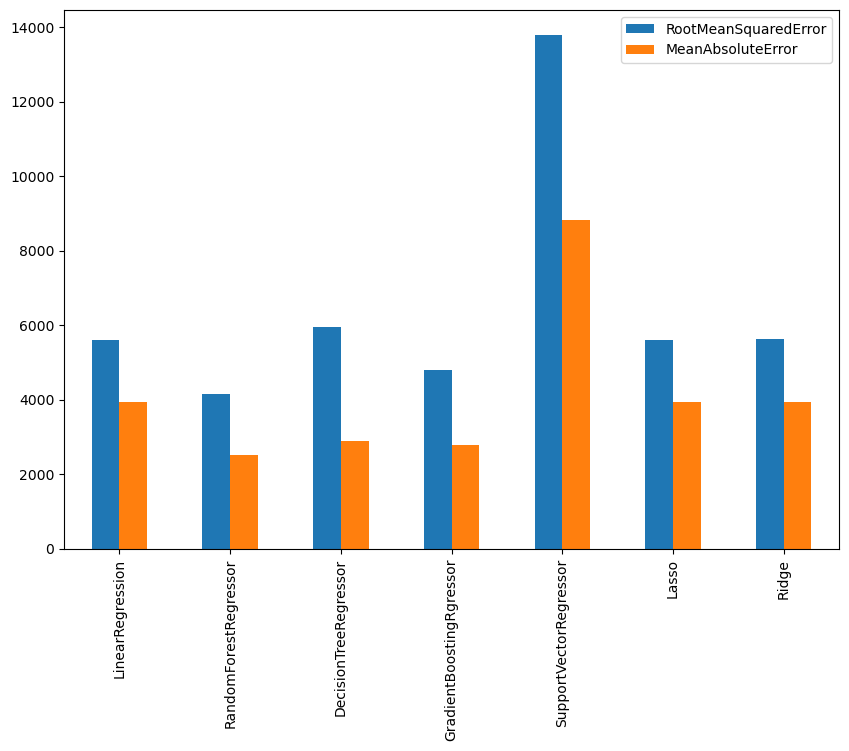

In [78]:
final_results.plot(kind='bar', figsize=(10,7));

In [79]:
#From the figure plot we cleary see that the model Random forest regressor model performs the best among all regressions models